In [1]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1273


In [2]:
import Distributions

┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1273


In [68]:
import Statistics

In [3]:
n = 20
x = reshape(LinRange(-1.0, 1.0, n), (1, n))
y = reshape(LinRange(-1.0, 1.0, n), (n, 1))

20×1 reshape(::LinRange{Float64}, 20, 1) with eltype Float64:
 -1.0                
 -0.8947368421052633 
 -0.7894736842105263 
 -0.6842105263157894 
 -0.5789473684210527 
 -0.4736842105263159 
 -0.368421052631579  
 -0.2631578947368421 
 -0.1578947368421053 
 -0.05263157894736853
  0.05263157894736836
  0.1578947368421053 
  0.26315789473684204
  0.368421052631579  
  0.4736842105263157 
  0.5789473684210527 
  0.6842105263157894 
  0.7894736842105263 
  0.894736842105263  
  1.0                

In [4]:
t = LinRange(0.0, 1.0, Integer(1.0/0.01))

100-element LinRange{Float64}:
 0.0,0.010101,0.020202,0.030303,0.040404,…,0.969697,0.979798,0.989899,1.0

In [5]:
ω_mean = (2 * π) / 0.2
ω_dist = Distributions.Normal(ω_mean)
ω = rand(ω_dist, (n, n))

20×20 Array{Float64,2}:
 31.9108  31.5709  30.9893  32.9555  …  30.4447  30.2432  31.7017  31.2096
 31.9896  31.2127  32.3899  32.8273     32.4431  30.9793  30.7295  30.8017
 31.3527  32.1868  31.6116  31.5405     31.8064  31.2564  29.0636  31.4021
 29.8895  30.8091  32.2879  29.7128     32.1375  31.7781  30.2707  32.4877
 32.2005  31.9067  30.3828  31.7149     32.1828  30.0075  30.3328  31.7684
 30.8685  32.138   31.1454  31.8385  …  31.0887  32.129   33.1469  32.9385
 32.636   32.6632  29.6154  32.4588     30.8174  30.8963  31.8794  31.2878
 31.1064  31.7103  29.4294  32.6013     30.8825  30.5548  31.3828  30.9702
 31.3407  32.804   30.5403  31.6922     31.5813  30.9934  31.3137  31.9287
 31.7598  31.1821  29.6319  30.7128     29.4733  30.7045  31.7361  31.8854
 33.098   29.817   30.4391  33.8483  …  31.6672  30.7835  29.4997  33.1554
 30.915   31.7995  30.4378  31.1464     31.1766  31.486   29.7274  30.6364
 30.6162  32.2063  31.3334  32.4013     31.5665  30.4254  32.4588  30.5807
 

In [6]:
ϕ_dist = Distributions.Normal(0, 0.1)
ϕ = rand(ϕ_dist, (n, n))

20×20 Array{Float64,2}:
  0.0279101   -0.0483381     0.0659001   …  -0.132286    -0.0765601 
  0.21271     -0.034059      0.170581        0.0872934    0.0714909 
 -0.0437541    0.0396597    -0.0742211       0.162041    -0.149216  
 -0.12862      0.000229104  -0.0357212       0.116805    -0.257765  
 -0.0117049   -0.0352617    -0.00440436     -0.00439233   0.0743386 
  0.0893266   -0.0080504     0.0173828   …   0.0208316   -0.00178971
  0.0796666    0.0207369     0.0202956       0.0901346   -0.076335  
  0.0368494   -0.123655     -0.00455766      0.0518518    0.0455199 
  0.0365206    0.159179      0.18001         0.103471     0.0477414 
  0.0955786    0.107275     -0.0199873      -0.00670601  -0.0148139 
 -0.0781429    0.107488     -0.0245168   …   0.142437    -0.142615  
 -0.0439492   -0.0956524     0.0407305       0.0249384   -0.0524834 
  0.0427927   -0.0174683     0.0466388      -0.0427883    0.0320403 
 -0.173719    -0.109276      0.143359        0.185633    -0.0866368 
  0.102787

$I(t) = \sin \left(\omega(x, y) t + \phi(x, y)\right) \exp^{-(x^2 + y^2)}$

In [7]:
gaussian = zeros(n, n)

broadcast!((x, y) -> exp.(-(x^2 + y^2)), gaussian, x, y)

20×20 Array{Float64,2}:
 0.135335  0.165207  0.197253  0.230353  …  0.197253  0.165207  0.135335
 0.165207  0.201673  0.240792  0.281197     0.240792  0.201673  0.165207
 0.197253  0.240792  0.287499  0.335742     0.287499  0.240792  0.197253
 0.230353  0.281197  0.335742  0.392081     0.335742  0.281197  0.230353
 0.263111  0.321186  0.383487  0.447838     0.383487  0.321186  0.263111
 0.293941  0.358821  0.428422  0.500313  …  0.428422  0.358821  0.293941
 0.321186  0.392081  0.468133  0.546687     0.468133  0.392081  0.321186
 0.343265  0.419033  0.500313  0.584268     0.500313  0.419033  0.343265
 0.358821  0.438023  0.522987  0.610746     0.522987  0.438023  0.358821
 0.366862  0.447838  0.534706  0.624431     0.534706  0.447838  0.366862
 0.366862  0.447838  0.534706  0.624431  …  0.534706  0.447838  0.366862
 0.358821  0.438023  0.522987  0.610746     0.522987  0.438023  0.358821
 0.343265  0.419033  0.500313  0.584268     0.500313  0.419033  0.343265
 0.321186  0.392081  0.4681

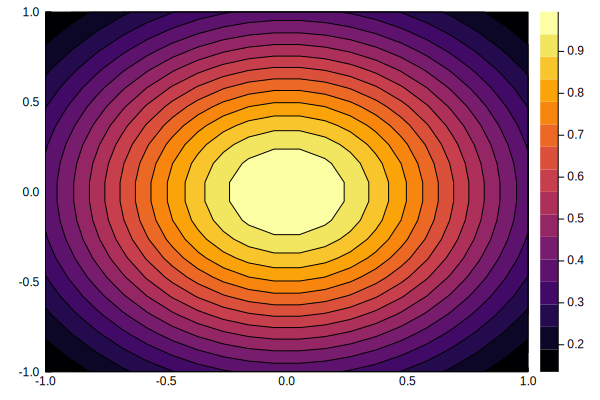

In [8]:
contour(LinRange(-1.0, 1.0, n), LinRange(-1, 1.0, n), gaussian, fill=true)

In [36]:
I_0 = (*).(sin.(ω * t[1] + ϕ), gaussian)

20×20 Array{Float64,2}:
  0.00377672  -0.00798269   0.0129896   …  -0.021791    -0.0103512  
  0.0348768   -0.00686745   0.0408756       0.0175824    0.0118008  
 -0.00862786   0.00954722  -0.0213189       0.0388476   -0.0293242  
 -0.0295463    6.44235e-5  -0.0119905       0.0327706   -0.0587215  
 -0.00307962  -0.0113232   -0.00168901     -0.00141075   0.0195413  
  0.0262218   -0.00288862   0.00744683  …   0.00747427  -0.000526068
  0.0255608    0.00812994   0.00950041      0.0352922   -0.0244939  
  0.0126463   -0.0516834   -0.00228025      0.0217179    0.01562    
  0.0131014    0.0694301    0.0936353       0.0452417    0.0171241  
  0.0350108    0.0479496   -0.0106866      -0.00300318  -0.00543445 
 -0.0286385    0.0480445   -0.013108    …   0.0635734   -0.052143   
 -0.0157648   -0.0418341    0.0212956       0.0109224   -0.0188235  
  0.0146848   -0.00731942   0.0233256      -0.0179242    0.0109964  
 -0.0555161   -0.0427599    0.0668817       0.0723658   -0.0277918  
  0.03016 

In [55]:
A = sin.((+).((*).(ω, reshape(t, (1, 1, length(t)))), ϕ))

20×20×100 Array{Float64,3}:
[:, :, 1] =
  0.0279064   -0.0483192     0.0658524   …  -0.131901    -0.0764853 
  0.211109    -0.0340524     0.169755        0.0871825    0.07143   
 -0.0437401    0.0396493    -0.0741529       0.161333    -0.148663  
 -0.128266     0.000229104  -0.0357136       0.11654     -0.25492   
 -0.0117047   -0.0352544    -0.00440434     -0.00439231   0.0742701 
  0.0892078   -0.00805031    0.017382    …   0.0208301   -0.00178971
  0.0795823    0.0207354     0.0202942       0.0900126   -0.0762609 
  0.0368411   -0.12334      -0.00455764      0.0518286    0.0455041 
  0.0365124    0.158508      0.17904         0.103286     0.0477233 
  0.0954331    0.107069     -0.019986       -0.00670596  -0.0148133 
 -0.0780634    0.107281     -0.0245144   …   0.141956    -0.142132  
 -0.0439351   -0.0955066     0.0407193       0.0249358   -0.0524593 
  0.0427796   -0.0174674     0.0466219      -0.0427753    0.0320348 
 -0.172847    -0.109059      0.142869        0.184569    -0.086

In [69]:
I = (*).(A, gaussian)

20×20×100 Array{Float64,3}:
[:, :, 1] =
  0.00377672  -0.00798269   0.0129896   …  -0.021791    -0.0103512  
  0.0348768   -0.00686745   0.0408756       0.0175824    0.0118008  
 -0.00862786   0.00954722  -0.0213189       0.0388476   -0.0293242  
 -0.0295463    6.44235e-5  -0.0119905       0.0327706   -0.0587215  
 -0.00307962  -0.0113232   -0.00168901     -0.00141075   0.0195413  
  0.0262218   -0.00288862   0.00744683  …   0.00747427  -0.000526068
  0.0255608    0.00812994   0.00950041      0.0352922   -0.0244939  
  0.0126463   -0.0516834   -0.00228025      0.0217179    0.01562    
  0.0131014    0.0694301    0.0936353       0.0452417    0.0171241  
  0.0350108    0.0479496   -0.0106866      -0.00300318  -0.00543445 
 -0.0286385    0.0480445   -0.013108    …   0.0635734   -0.052143   
 -0.0157648   -0.0418341    0.0212956       0.0109224   -0.0188235  
  0.0146848   -0.00731942   0.0233256      -0.0179242    0.0109964  
 -0.0555161   -0.0427599    0.0668817       0.0723658   -0.0277

In [76]:
anim = @animate for i ∈ size(I)[3]
    contourf(I[:, :, i])
end

Animation("/tmp/jl_XCCg9Z", ["000001.png"])

┌ Info: Saved animation to 
│   fn = /home/jovyan/work/test.gif
└ @ Plots /opt/julia/packages/Plots/HPgBD/src/animation.jl:102


Plots.AnimatedGif("/home/jovyan/work/test.gif")
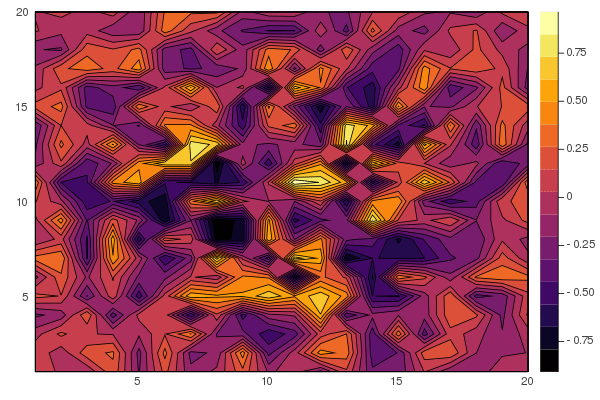

In [77]:
gif(anim, "test.gif", fps = 15)